# 任务1：对数据进行探索和分析 5.11-5.12
数据集是金融数据（非原始数据，已经处理过了），我们要做的是预测贷款用户是否会逾期。
表格中 "status" 是结果标签：0表示未逾期，1表示逾期。

要求：
1. 数据切分方式 - 三七分，其中测试集30%，训练集70%，随机种子设置为2018
2. 数据类型的分析
3. 无关特征删除
4. 数据类型转换
5. 缺失值处理
6. 其他可借鉴的数据分析处理

In [0]:
import numpy as np
import pandas as pd

## 一. 读取数据
读取任务1中csv文件是要将编码格式制定成gbk；
中文字符的Unicode编码0x0800-0xFFFF之间,(utf-8包含了部分汉字)
当你试图将该“中文字符”转成U码的utf-8时超出了其范筹
而GBK 规范收录了ISO 10646.1中的全部 CJK 汉字和符号，并有所补充，
所以解决方法是将.decode('utf-8')改为.decode('gbk')
参考：https://blog.csdn.net/stone9159/article/details/79071316

In [2]:
# 导入数据
data = pd.read_csv(r"task1_data.csv",encoding="gbk")
# 将显示的最大列数设置成100，以展示全部列
pd.set_option("max_columns", 100)
# 抽样查看数据
data.sample(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
3604,9098,2144372,20180507115819718000000388220657,卡号1,0.02,0.98,300,2.14,0.43,0.255,17.0,28.0,15.0,4.0,1.0,9060,0,30.0,20120520.0,58500,126.0,0.35,19150,7.0,4010,0.15,910,0.55,一线城市,7.0,28.0,7.0,28.0,NaN,2.0,2.0,7.0,344948.0,1500,3.0,0.0,0,1090,0.0,0,xs,2192.0,82.0,刘凯,621.0,72.0,5.0,2.0,3.0,9.0,2018-01-08,0.0,0.0,4.0,589.0,69.0,5.0,5.0,0.0,3.0,0.0,3.0,0.0,0.0,3.0,5.0,1.0,0.0,0.0,234.0,2017-12-12,1100.0,69.0,3.0,3.0,2300.0,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,146.0
1618,4146,3435371,20180504181848584000000021295823,卡号1,0.04,0.54,0,0.52,0.96,0.452,22.0,44.0,17.0,3.0,NaN,17120,0,22.0,20160425.0,185220,211.0,0.15,60790,9.0,11190,0.05,1050,0.50,三线城市,4.0,17.0,4.0,17.0,2.0,3.0,3.0,3.0,654.0,3550,7.0,0.0,1270,84610,0.0,0,xs,756.0,82.0,倪舒康,629.0,74.0,21.0,13.0,5.0,30.0,2018-05-05,11.0,15.0,24.0,594.0,80.0,6.0,2.0,0.0,3.0,2.0,1.0,2.0,2.0,5.0,2.0,4.0,0.0,2.0,359.0,2018-04-30,4300.0,79.0,1.0,2.0,4300.0,4300.0,1200.0,80.0,2.0,3.0,1200.0,1100.0,-1.0,4.0
2956,7383,627789,20180507120419845000000388242958,卡号1,0.01,0.99,0,18.90,1.00,0.111,14.0,30.0,29.0,3.0,NaN,10850,0,17.0,20161019.0,72070,66.0,0.85,2240,8.0,1350,1.00,1190,0.50,一线城市,0.0,29.0,0.0,29.0,0.0,0.0,7.0,7.0,0.0,230,4.0,0.0,230,460,0.0,1,xs,579.0,101.0,孙海强,639.0,80.0,9.0,5.0,3.0,11.0,2018-04-13,3.0,4.0,8.0,598.0,75.0,12.0,10.0,0.0,8.0,3.0,5.0,0.0,1.0,5.0,11.0,8.0,0.0,0.0,233.0,2018-03-10,2000.0,74.0,5.0,5.0,2400.0,1700.0,9100.0,78.0,3.0,4.0,13200.0,6533.0,24.0,58.0
333,837,934519,20180507114720536000000388185425,卡号1,0.06,0.89,1000,1.15,0.96,0.291,20.0,24.0,23.0,3.0,NaN,11430,0,26.0,20151218.0,167970,159.0,0.55,21130,8.0,4570,0.40,730,0.60,一线城市,6.0,24.0,6.0,24.0,0.0,0.0,1.0,2.0,30.0,1300,9.0,0.0,0,9450,0.0,0,xs,885.0,84.0,周盼盼,654.0,72.0,11.0,4.0,3.0,18.0,2018-04-29,13.0,17.0,18.0,629.0,77.0,18.0,14.0,1.0,8.0,4.0,4.0,1.0,1.0,11.0,81.0,10.0,4.0,2.0,354.0,2018-04-26,1900.0,72.0,4.0,4.0,2400.0,1825.0,7100.0,79.0,4.0,5.0,10200.0,7200.0,8.0,11.0
4358,11011,2552406,20180507121830007000000388296643,卡号1,0.02,0.98,0,2.24,1.00,0.203,12.0,28.

## 二. 数据分析与处理
1. 数据类型、重复值分析
2. 无关特征删除、类型转换
3. 缺失值处理
4. 其他可借鉴的数据分析处理

### 1. 数据类型分析

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

(4754, 90)

### 2. 重复值分析

In [4]:
# 检查是否要重复数据
data.duplicated().any()

False

In [5]:
# 检查是否用重复的用户，结果False
data["custid"].duplicated().any()

False

### 3. 无关特征删除、类型转换

#### 3.1 object类型的数据

In [6]:
data.select_dtypes(include="object").columns

Index(['trade_no', 'bank_card_no', 'reg_preference_for_trad', 'source',
       'id_name', 'latest_query_time', 'loans_latest_time'],
      dtype='object')

In [7]:
'''分析object类型数据'''
# 检查是否有重复的trade_no，结果False，且交易的单号不影响结果需要删除
# display(data["trade_no"].duplicated().any())
# 检查bank_card_no，全为相同内容，需要删除
display(data["bank_card_no"].value_counts())
# 检查reg_preference_for_trad，分为5大类需要使用LabelEncoder编码
display(data["reg_preference_for_trad"].value_counts())
# 检查source，全为相同内容，需要删除
display(data["source"].value_counts())
# loans_latest_time、latest_query_time 时间内容需要调整
#id_name为用户姓名不影响结果需要删除

卡号1    4754
Name: bank_card_no, dtype: int64

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

xs    4754
Name: source, dtype: int64

In [8]:
'''处理object类型数据'''
#删除trade_no、bank_card_no、source、id_name、source列
data.drop(columns=["trade_no","bank_card_no","id_name","source"], axis=1, inplace=True)
data.select_dtypes(include="object").columns

Index(['reg_preference_for_trad', 'latest_query_time', 'loans_latest_time'], dtype='object')

In [9]:
#LabelEncoder编码处理reg_preference_for_trad
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data["reg_preference_for_trad"] = lb.fit_transform(data["reg_preference_for_trad"].astype(str))
data["reg_preference_for_trad"].value_counts()

1    3403
2    1064
5     150
3     131
4       4
0       2
Name: reg_preference_for_trad, dtype: int64

In [0]:
# 将'latest_query_time', 'loans_latest_time'转换成日期格式，然后计算与当前日期的天数差值
data['latest_query_time'] = (pd.to_datetime(data['latest_query_time']) - pd.to_datetime('today')).apply(lambda col: col.days)
data['loans_latest_time'] = (pd.to_datetime(data['loans_latest_time']) - pd.to_datetime('today')).apply(lambda col: col.days)

#### 3.2 非object类型的数据

In [0]:
# Unnamed: 0 为序号需要删除，custid为用户id需要删除
data.drop(columns=["Unnamed: 0","custid"], axis=1, inplace=True)

### 4. 缺失值处理

In [12]:
data.isnull().sum().value_counts()

297     30
2       15
0       12
304     11
8        6
16       3
12       2
104      1
2998     1
426      1
26       1
3        1
dtype: int64

In [13]:
data.isnull().sum().argmax()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'student_feature'

In [0]:
#找出缺失值最多的特征，经检查为student_feature，预估含义是用户的学生类型，考虑将空值设成0
data["student_feature"].fillna(value=0,inplace=True)

In [15]:
data.isnull().sum(axis=1).value_counts()

0     3983
1      385
41     249
2       37
42      27
11      22
31      12
30       8
3        7
4        7
12       5
10       3
5        3
6        1
13       1
15       1
44       1
32       1
43       1
dtype: int64

In [16]:
# 仅保留至少包含49个非NA值的行。
display(data.shape)
data.dropna(thresh=49,inplace=True)
# data.info()
data["status"].isnull().any()
display(data.shape)
data.isnull().sum(axis=1).value_counts()

(4754, 84)

(4476, 84)

0     3983
1      385
2       37
11      22
31      12
30       8
3        7
4        7
12       5
10       3
5        3
15       1
6        1
13       1
32       1
dtype: int64

In [17]:
data.info()
data.isnull().sum().argmax()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476 entries, 0 to 4753
Data columns (total 84 columns):
low_volume_percent                            4474 non-null float64
middle_volume_percent                         4474 non-null float64
take_amount_in_later_12_month_highest         4476 non-null int64
trans_amount_increase_rate_lately             4473 non-null float64
trans_activity_month                          4474 non-null float64
trans_activity_day                            4474 non-null float64
transd_mcc                                    4474 non-null float64
trans_days_interval_filter                    4468 non-null float64
trans_days_interval                           4474 non-null float64
regional_mobility                             4474 non-null float64
student_feature                               4476 non-null float64
repayment_capability                          4476 non-null int64
is_high_user                                  4476 non-null int64
number_of_trans

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


'cross_consume_count_last_1_month'

In [18]:
data["cross_consume_count_last_1_month"]

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
5       1.0
6       NaN
8       2.0
9       0.0
10      0.0
11      0.0
12      4.0
13      0.0
14      1.0
15      0.0
16      0.0
17      0.0
18      0.0
19      1.0
20      2.0
21      0.0
22      2.0
23      2.0
24      0.0
25      NaN
26      3.0
27      0.0
28      0.0
29      0.0
30      4.0
       ... 
4723    0.0
4724    0.0
4725    NaN
4726    0.0
4727    0.0
4728    0.0
4729    0.0
4730    0.0
4731    0.0
4732    NaN
4733    0.0
4734    0.0
4735    0.0
4736    0.0
4737    0.0
4738    3.0
4739    1.0
4740    1.0
4741    0.0
4742    0.0
4743    0.0
4744    0.0
4745    1.0
4747    3.0
4748    NaN
4749    0.0
4750    1.0
4751    1.0
4752    0.0
4753    1.0
Name: cross_consume_count_last_1_month, Length: 4476, dtype: float64

In [0]:
# 找出缺失值最多的特征，cross_consume_count_last_1_month，预估含义是用户超过一个月消费的累计次数，故考虑填充为0
data["cross_consume_count_last_1_month"].fillna(value=0,inplace=True)

In [0]:
# 其余缺失值考虑用均值来代替
data.fillna(data.mean(),inplace=True)

## 三. 数据切分

In [0]:
# 将标签和特征拆分
y = data["status"]
data.drop(["status"], axis=1, inplace=True)
x = data

In [22]:
# 将数据按3:7拆分测试集和训练集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2018)
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(3133, 83)

(1343, 83)

(3133,)

(1343,)

# 任务2：特征工程 5.13-5.14
目标
预测贷款用户是否会逾期。表格中 "status" 是结果标签：0表示未逾期，1表示逾期。

要求
1. 特征衍生
2. 特征挑选：分别用IV值和随机森林等进行特征选择
3. 其他特征工程处理

## 一. 随机森林进行特征选择

In [23]:
# 随机森林进行特征选择
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, random_state=2019)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [24]:
feat_labels = data.columns
importances =forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range (x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 10, feat_labels[indices[f]], importances[indices[f]]))

 1) history_fail_fee 0.048756
 2) trans_fail_top_count_enum_last_1_month 0.045476
 3) loans_score 0.037631
 4) apply_score 0.030467
 5) latest_one_month_fail 0.029355
 6) loans_overdue_count 0.023539
 7) trans_amount_3_month 0.016490
 8) max_cumulative_consume_later_1_month 0.016106
 9) latest_query_day 0.015476
10) loans_avg_limit 0.015357
11) repayment_capability 0.015348
12) abs        0.015252
13) trans_amount_increase_rate_lately 0.015173
14) first_transaction_day 0.014736
15) latest_query_time 0.014623
16) consfin_avg_limit 0.014615
17) historical_trans_amount 0.014606
18) avg_price_last_12_month 0.014443
19) first_transaction_time 0.014205
20) consfin_credit_limit 0.013508
21) historical_trans_day 0.013403
22) pawns_auctions_trusts_consume_last_6_month 0.013393
23) trans_activity_day 0.013350
24) loans_long_time 0.013197
25) history_suc_fee 0.013087
26) loans_latest_day 0.013012
27) loans_latest_time 0.012875
28) trans_day_last_12_month 0.012810
29) trans_days_interval_filter 0.

In [25]:
display(importances.shape)

threshold = 0.01
x_selected = list(x_train.columns[importances> threshold])
display(x_selected)
x_train_sel = x_train[x_selected]
display(x_train_sel.shape)
x_test_sel = x_test[x_selected]
display(x_test_sel.shape)

(83,)

['trans_amount_increase_rate_lately',
 'trans_activity_day',
 'transd_mcc',
 'trans_days_interval_filter',
 'trans_days_interval',
 'repayment_capability',
 'number_of_trans_from_2011',
 'first_transaction_time',
 'historical_trans_amount',
 'historical_trans_day',
 'rank_trad_1_month',
 'trans_amount_3_month',
 'abs',
 'avg_price_last_12_month',
 'trans_top_time_last_1_month',
 'trans_top_time_last_6_month',
 'consume_top_time_last_6_month',
 'trans_fail_top_count_enum_last_1_month',
 'trans_fail_top_count_enum_last_6_month',
 'trans_fail_top_count_enum_last_12_month',
 'max_cumulative_consume_later_1_month',
 'pawns_auctions_trusts_consume_last_6_month',
 'first_transaction_day',
 'trans_day_last_12_month',
 'apply_score',
 'apply_credibility',
 'query_sum_count',
 'latest_query_time',
 'loans_score',
 'loans_count',
 'loans_settle_count',
 'loans_overdue_count',
 'history_suc_fee',
 'history_fail_fee',
 'latest_one_month_fail',
 'loans_long_time',
 'loans_latest_time',
 'loans_credi

(3133, 45)

(1343, 45)

## 二. IV值进行特征选择

In [0]:
# 参考别的同学代码，还得再研究研究
import math
from sklearn.utils.multiclass import type_of_target
from scipy import stats
#求woe值和iv值
def woe(X, y, event):
    res_woe = []  #列表存放woe字典
    res_iv = []  #列表存放iv
    X1 = feature_discretion(X) #对连续型特征进行处理
    for i in range(0, X1.shape[-1]):  #遍历所有特征
        x = X1[:, i]  #单个特征
        woe_dict, iv1 = woe_single_x(x, y, event)  #计算单个特征的woe值
        res_woe.append(woe_dict)
        res_iv.append(iv1)
    return np.array(res_woe), np.array(res_iv)  #返回数组

#求单个特征的woe值
def woe_single_x(x, y, event):
    event_total, non_event_total = count_binary(y, event) #计算好人坏人总数
    x_labels = np.unique(x) #特征中的分段
    woe_dict = {}  #存放每个分段的名称 以及 其对应的woe值
    iv = 0
    for x1 in x_labels: #遍历每个分段
        y1 = y[np.where(x == x1)[0]]
        event_count, non_event_count = count_binary(y1, event=event)
        rate_event = 1.0 * event_count / event_total
        rate_non_event = 1.0 * non_event_count / non_event_total
        #woe无穷大时处理
        if rate_event == 0:
            print()#print("{'",x1,"'}"+":全是好人") #只输出不做处理
        elif rate_non_event == 0:
            print()#print("{'",x1,"'}"+":全是坏人")
        else:
            woe1 = math.log(rate_event / rate_non_event)
            woe_dict[x1] = woe1  
            iv += (rate_event - rate_non_event) * woe1
    return woe_dict, iv

#计算个数
def count_binary(a, event):
    event_count = (a == event).sum()
    non_event_count = a.shape[-1] - event_count
    return event_count, non_event_count

#判断特征数据是否为离散型
def feature_discretion(X):
    temp = []
    for i in range(0, X.shape[-1]):
        x = X[:, i]
        x_type = type_of_target(x)
        if pd.Series(list(x)).dtype != 'O':
            x1 = discrete(x)
            temp.append(x1)
        else:
            temp.append(x)
    return np.array(temp).T

#对连续型特征进行离散化
def discrete(x):
    res = np.array([0] * x.shape[-1], dtype=int)
    for i in range(5):
        point1 = stats.scoreatpercentile(x, i * 20)
        point2 = stats.scoreatpercentile(x, (i + 1) * 20)
        x1 = x[np.where((x >= point1) & (x <= point2))]
        mask = np.in1d(x, x1)
        res[mask] = (i + 1)
    return res

In [27]:
a, b = woe(x_train.values, y_train.values, 1)
dic = dict(zip(x_train.columns, b))
dic_sort= sorted(dic.items(),key = lambda x:x[1],reverse = True)
display(dic_sort)

[('trans_fail_top_count_enum_last_1_month', 0.5248772375361611),
 ('history_fail_fee', 0.5182986633722628),
 ('loans_score', 0.452489516316483),
 ('apply_score', 0.35559944136124455),
 ('loans_overdue_count', 0.34429411897272244),
 ('trans_fail_top_count_enum_last_12_month', 0.2102113960316464),
 ('trans_fail_top_count_enum_last_6_month', 0.20334118478792862),
 ('latest_one_month_fail', 0.1676951302166592),
 ('latest_one_month_suc', 0.13658960583308047),
 ('rank_trad_1_month', 0.08850389928144903),
 ('max_cumulative_consume_later_1_month', 0.08709447156340241),
 ('trans_day_last_12_month', 0.07519987825898371),
 ('trans_top_time_last_1_month', 0.07200473738156228),
 ('top_trans_count_last_1_month', 0.05925078215773383),
 ('pawns_auctions_trusts_consume_last_1_month', 0.05710932443358767),
 ('consfin_avg_limit', 0.04623664582308415),
 ('latest_query_time', 0.04435584273650805),
 ('latest_query_day', 0.03964158427506999),
 ('consfin_credit_limit', 0.03846353095825428),
 ('trans_amount_3_

In [28]:
# 数据的标准化处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sel_sc = sc.fit_transform(x_train_sel)
x_test_sel_sc = sc.fit_transform(x_test_sel)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# 任务3： 模型构建 5.15-5.16
目标 模型构建，评价方式考虑：accuracy、precision，recall和F1-score、auc值的评分表格

要求：
1. 用逻辑回归、svm和决策树；
2. 随机森林和XGBoost进行模型构建

# 任务4：模型评价 5.17-5.18
增加评价指标ROC曲线。
参考文档：[sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

# 任务5：模型调优 5.19-5.21
使用网格搜索法对5个模型进行调优（调参时采用五折交叉验证的方式），并进行模型评估。

In [0]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [0]:
import warnings
warnings.filterwarnings("ignore")

## 一、逻辑回归

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_parameters = {'penalty':['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr_gridsearch = GridSearchCV(lr, param_grid=lr_parameters, cv=5)
lr_gridsearch.fit(x_train_sel_sc, y_train)
print(lr_gridsearch.best_params_)
y_pre_lr = lr_gridsearch.predict(x_test_sel_sc)
display(accuracy_score(y_pre_lr, y_test))
print(classification_report(y_pre_lr, y_test))

{'C': 0.001, 'penalty': 'l2'}


0.7810871183916605

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1119
           1       0.40      0.62      0.48       224

   micro avg       0.78      0.78      0.78      1343
   macro avg       0.66      0.72      0.67      1343
weighted avg       0.83      0.78      0.80      1343



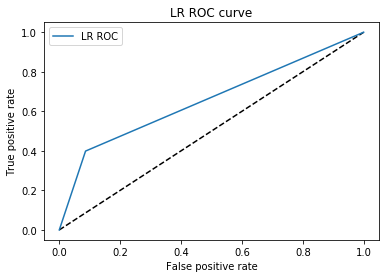

In [32]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_lr, tpr_lr, _  = roc_curve(y_test, y_pre_lr)
plt.plot(fpr_lr, tpr_lr, label='LR ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LR ROC curve')
plt.legend(loc='best')
plt.show()

## 二. SVM

In [33]:
from sklearn.svm import SVC
# 'linear', 'poly', 'rbf', 'sigmoid'
svc = SVC()
svc_parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
svc_gridsearch = GridSearchCV(svc, param_grid=svc_parameters, cv=5)
svc_gridsearch.fit(x_train_sel_sc, y_train)
print(svc_gridsearch.best_params_)
svc_gridsearch.fit(x_train_sel_sc, y_train)
y_pre_svc = svc_gridsearch.predict(x_test_sel_sc)
display(accuracy_score(y_pre_svc, y_test))
print(classification_report(y_pre_svc, y_test))

{'C': 1, 'kernel': 'rbf'}


0.7922561429635145

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1222
           1       0.27      0.78      0.40       121

   micro avg       0.79      0.79      0.79      1343
   macro avg       0.62      0.79      0.64      1343
weighted avg       0.91      0.79      0.83      1343



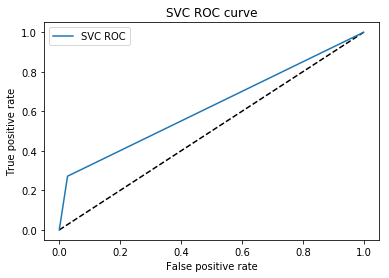

In [34]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_svc, tpr_svc, _  = roc_curve(y_test, y_pre_svc)
plt.plot(fpr_svc, tpr_svc, label='SVC ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC ROC curve')
plt.legend(loc='best')
plt.show()

## 三. 决策树

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_parameters = {'criterion':['gini', 'entropy'], 'max_depth':range(1,100)}
dtc_gridsearch = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5)
dtc_gridsearch.fit(x_train_sel_sc, y_train)
print(dtc_gridsearch.best_params_)
dtc_gridsearch.fit(x_train_sel_sc, y_train)
y_pre_dtc = dtc_gridsearch.predict(x_test_sel_sc)
display(accuracy_score(y_pre_dtc, y_test))
print(classification_report(y_pre_dtc, y_test))

{'criterion': 'gini', 'max_depth': 3}


0.7728965003723008

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1218
           1       0.24      0.66      0.35       125

   micro avg       0.77      0.77      0.77      1343
   macro avg       0.60      0.72      0.61      1343
weighted avg       0.89      0.77      0.81      1343



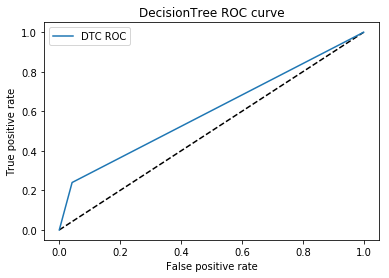

In [36]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_dtc, tpr_dtc, _  = roc_curve(y_test, y_pre_dtc)
plt.plot(fpr_dtc, tpr_dtc, label='DTC ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTree ROC curve')
plt.legend(loc='best')
plt.show()

## 四. 随机森林

In [37]:
rf = RandomForestClassifier()
rf_parameters = {'criterion':['gini', 'entropy'], 'max_depth':range(1,100)}
rf_gridsearch = GridSearchCV(rf, param_grid=rf_parameters, cv=5)
rf_gridsearch.fit(x_train_sel_sc, y_train)
print(rf_gridsearch.best_params_)
rf_gridsearch.fit(x_train_sel_sc, y_train)
y_pre_rf = rf_gridsearch.predict(x_test_sel_sc)
display(accuracy_score(y_pre_rf, y_test))
print(classification_report(y_pre_rf, y_test))

{'criterion': 'gini', 'max_depth': 61}


0.7803425167535368

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1236
           1       0.23      0.74      0.35       107

   micro avg       0.78      0.78      0.78      1343
   macro avg       0.60      0.76      0.61      1343
weighted avg       0.91      0.78      0.83      1343



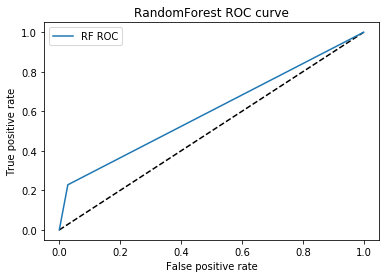

In [38]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_rf, tpr_rf, _  = roc_curve(y_test, y_pre_rf)
plt.plot(fpr_rf, tpr_rf, label='RF ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForest ROC curve')
plt.legend(loc='best')
plt.show()

## 五. XGBoost

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_parameters = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
xgb_gridsearch = GridSearchCV(xgb, param_grid=xgb_parameters, cv=5)
xgb_gridsearch.fit(x_train_sel_sc, y_train)
print(xgb_gridsearch.best_params_)
xgb_gridsearch.fit(x_train_sel_sc, y_train)
y_pre_xgb = xgb_gridsearch.predict(x_test_sel_sc)
display(accuracy_score(y_pre_xgb, y_test))
print(classification_report(y_pre_xgb, y_test))

{'max_depth': 5, 'min_child_weight': 1}


0.7781087118391661

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1235
           1       0.23      0.72      0.34       108

   micro avg       0.78      0.78      0.78      1343
   macro avg       0.60      0.75      0.61      1343
weighted avg       0.91      0.78      0.82      1343



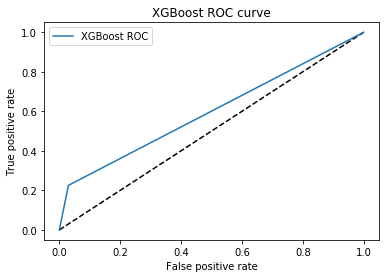

In [42]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_xgb, tpr_xgb, _  = roc_curve(y_test, y_pre_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc='best')
plt.show()